In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
import scipy
from scipy.io.wavfile import write
from scipy.fft import fft, fftfreq
import itertools
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import gdown
from scipy.fft import fft, fftfreq
from scipy.fft import rfft, rfftfreq

# Графики и спектры шума в зависимости от окна усреднения

In [2]:
SAMPLE_RATE = 1000  # Гц
DURATION = 15  # Секунды

df = pd.DataFrame({'x':np.random.normal(0,1,SAMPLE_RATE * (DURATION +1))})
for i in [2,3,4,5,10,15, 20, 50, 70, 100]:
    df['mean_'+str(i)] = df.x.rolling(window = i).mean()
df = df.dropna()
# Нормализация
for i in df.columns:
    df[i] = df[i]/np.abs(df[i]).max()
df = df.reset_index(drop = True)
df

,x,mean_2,mean_3,mean_4,mean_5,mean_10,mean_15,mean_20,mean_50,mean_70,mean_100
0,-0.184428,-0.196036,-0.040224,0.007457,-0.109069,-0.313907,-0.273254,-0.138125,-0.084477,-0.444534,-0.665372
1,0.018318,-0.135476,-0.135815,-0.027239,0.015675,-0.276527,-0.226835,-0.165271,-0.101881,-0.438742,-0.632956
2,-0.053471,-0.028671,-0.134308,-0.158176,-0.050526,-0.237288,-0.176629,-0.183715,-0.113250,-0.418443,-0.642328
3,-0.115727,-0.137995,-0.092287,-0.192502,-0.195886,-0.233297,-0.216251,-0.247456,-0.096357,-0.484356,-0.643057
4,0.050209,-0.053435,-0.072781,-0.057796,-0.142742,-0.198079,-0.278453,-0.228440,-0.143145,-0.465553,-0.619347
...,...,...,...,...,...,...,...,...,...,...,...
15896,0.227155,0.317974,0.391502,0.383009,0.174583,0.035728,0.084282,-0.074585,-0.116995,-0.000205,0.132652
15897,-0.230407,-0.002652,0.097539,0.235190,0.218662,-0.050560,0.039050,-0.099109,-0.129870,-0.046526,0.126354
15898,-0.254993,-0.395883,-0.157957,-0.054842,0.077439,-0.071986,-0.055875,-0.144182,-0.181400,-0.084907,0.108752
15899,-0.288201,-0.443018,-0.473176,-0.313717,-0.192122,-0.177621,-0.221377,-0.172844,-0.226211,-0.119680,0.087221


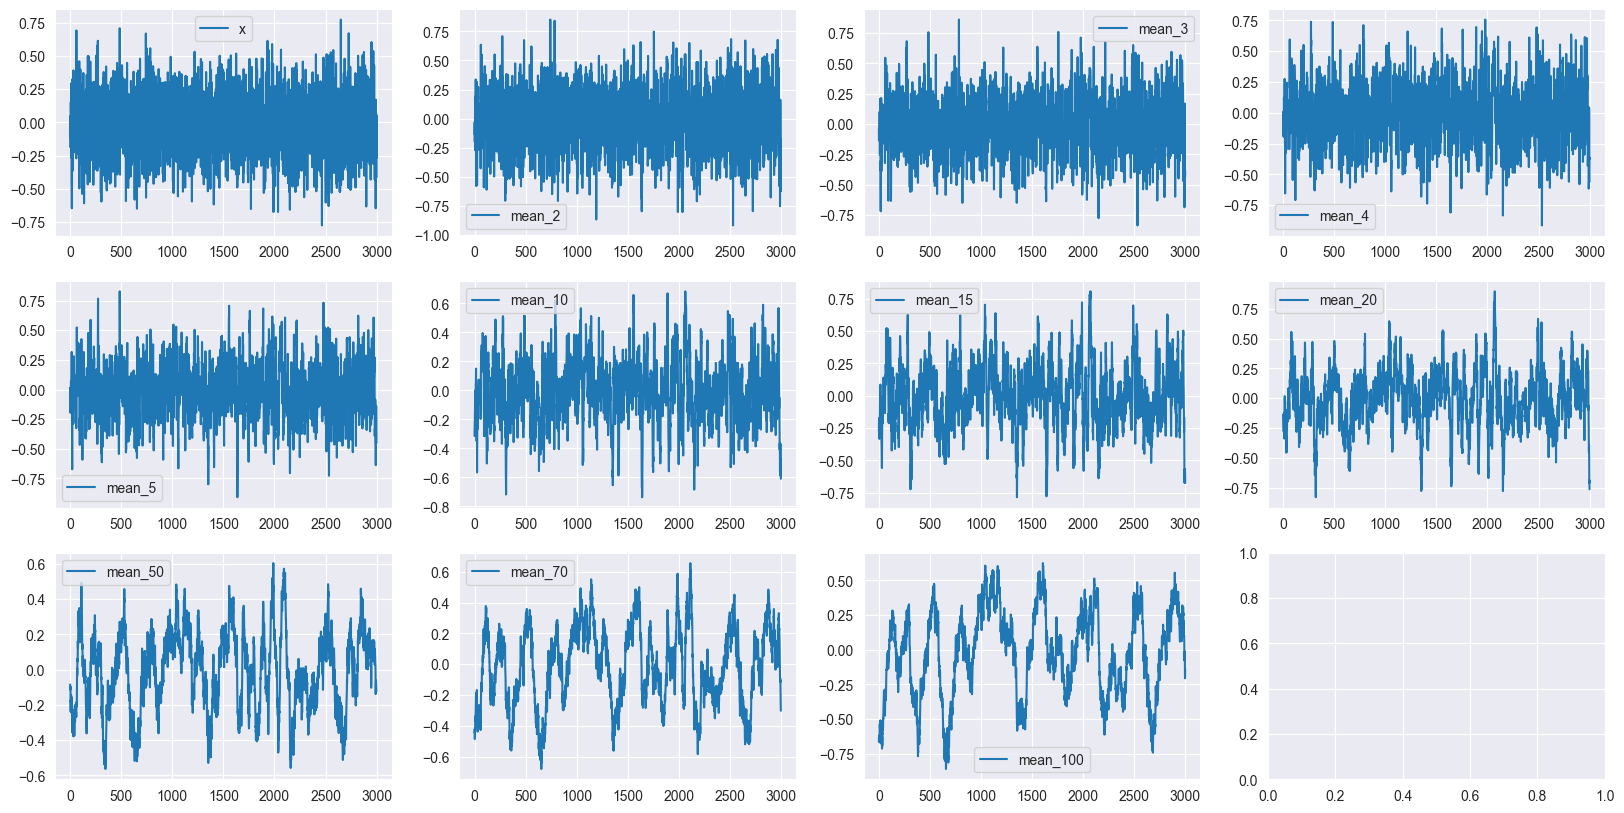

In [3]:
# Построение графиков
N  = 3000     # Какой длины графики строим
ncols = 4
if df.shape[1] % ncols ==0:
    nrows = int(df.shape[1] / ncols)
else:
    nrows = int(df.shape[1]/ncols) + 1
# Задаем пространство для подграфиков
f, axes = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(20,10)) # параметры shareх и sharey - если False, то у каждого графика
                                                                         # будет отображена своя ось х и y, если True, то оси х и у будут
                                                                         # общими для всего пространства графиков

ind = 0
flag = False
for i in range(nrows):
    for j in range(ncols):
        y = df.iloc[:N, ind].values

        axes[i,j].plot(y,label=list(df.columns)[ind])
        axes[i,j].legend()
        ind += 1

        if ind > df.shape[1]-1:
            flag = True
            break
    if flag:
        break

plt.show()


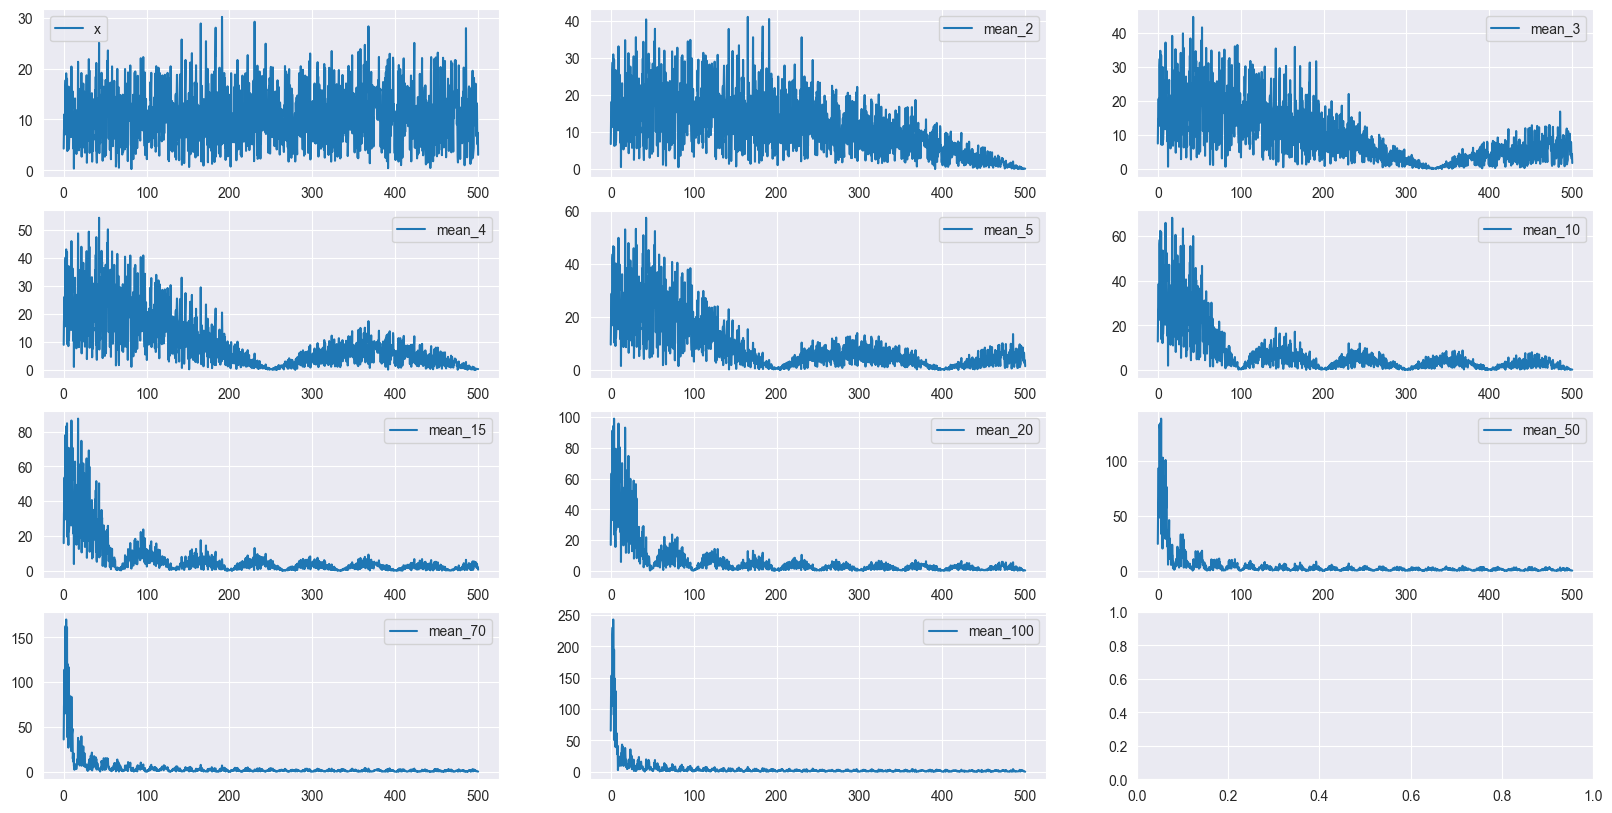

In [4]:
# Построение графиков
N  = 3000     # Какой длины графики берем
ncols = 3
if df.shape[1] % ncols ==0:
    nrows = int(df.shape[1] / ncols)
else:
    nrows = int(df.shape[1]/ncols) + 1
# Задаем пространство для подграфиков
f, axes = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(20,10)) # параметры shareх и sharey - если False, то у каждого графика
                                                                         # будет отображена своя ось х и y, если True, то оси х и у будут
                                                                         # общими для всего пространства графиков

ind = 0
flag = False
for i in range(nrows):
    for j in range(ncols):
        y = df.iloc[:N, ind].values
        yf = rfft(y)
        xf = rfftfreq(N, 1 / SAMPLE_RATE)
        # График с координатами положения (0,0) по отношению к оси
        axes[i,j].plot(xf, np.abs(yf),label=list(df.columns)[ind])
        axes[i,j].legend()
        ind += 1

        if ind > df.shape[1]-1:
            flag = True
            break
    if flag:
        break

plt.show()

# Сравниваем спектр в зависимости от длины сигнала

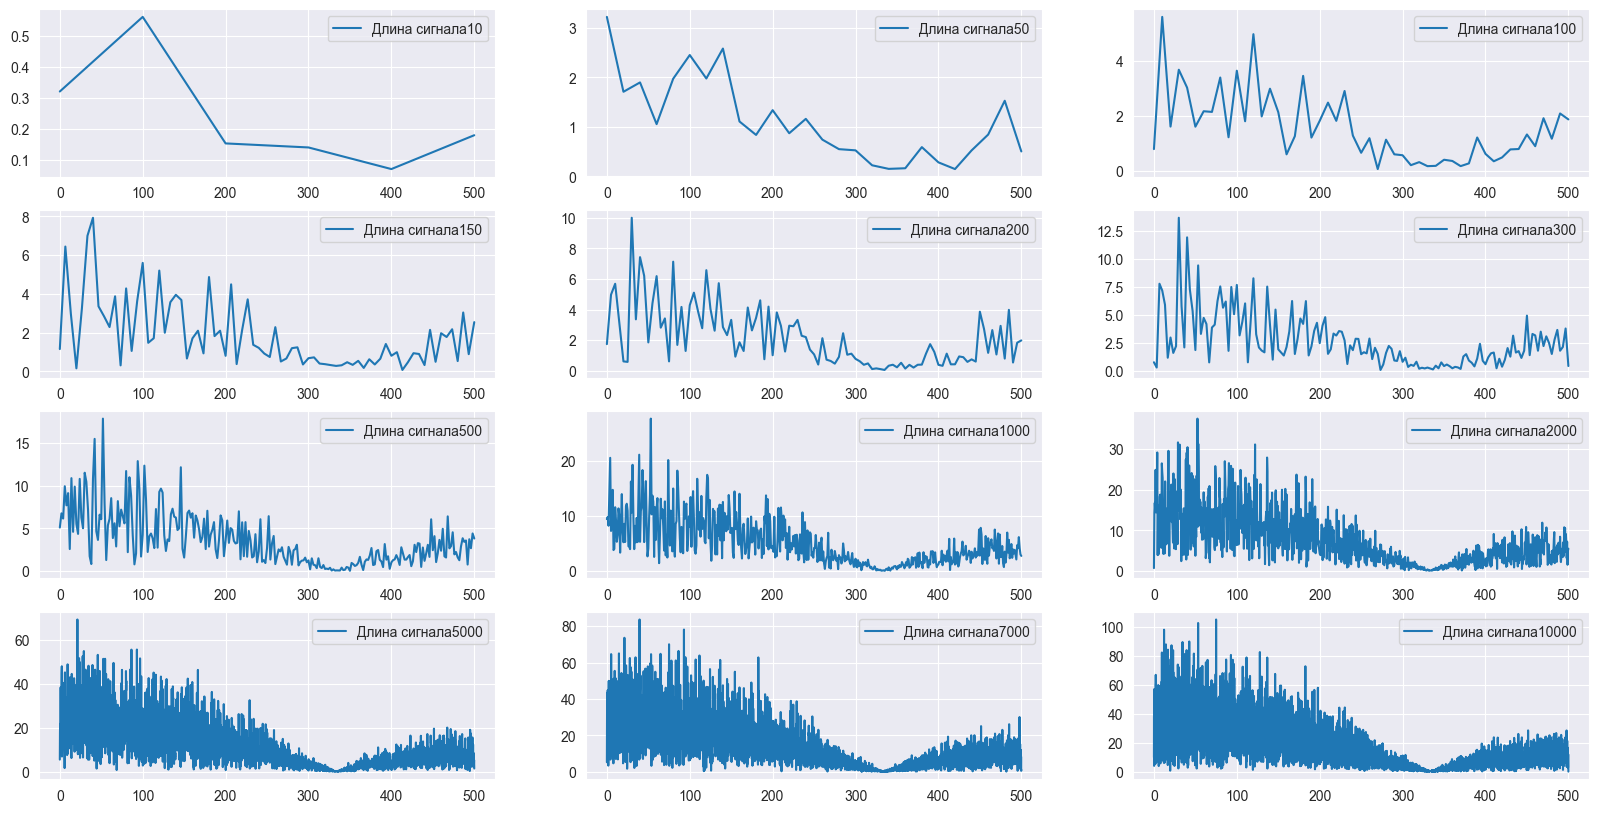

In [5]:
# Для примера возьмем mean 5
# Построение графиков
col_name = 'mean_3'
N = [10, 50, 100, 150, 200, 300, 500, 1000, 2000, 5000, 7000, 10000]
ncols = 3
if len(N) % ncols ==0:
    nrows = int(len(N) / ncols)
else:
    nrows = int(len(N)/ncols) + 1
# Задаем пространство для подграфиков
f, axes = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(20,10)) # параметры shareх и sharey - если False, то у каждого графика
                                                                         # будет отображена своя ось х и y, если True, то оси х и у будут
                                                                         # общими для всего пространства графиков
ind_col = list(df.columns).index(col_name)
ind = 0
flag = False
for i in range(nrows):
    for j in range(ncols):
        y = df.iloc[:N[ind], ind_col].values
        yf = rfft(y)
        xf = rfftfreq(N[ind], 1 / SAMPLE_RATE)
        # График с координатами положения (0,0) по отношению к оси
        axes[i,j].plot(xf, np.abs(yf),label='Длина сигнала'+ str(N[ind]))
        axes[i,j].legend()
        ind += 1

        if ind > len(N)-1:
            flag = True
            break
    if flag:
        break

plt.show()

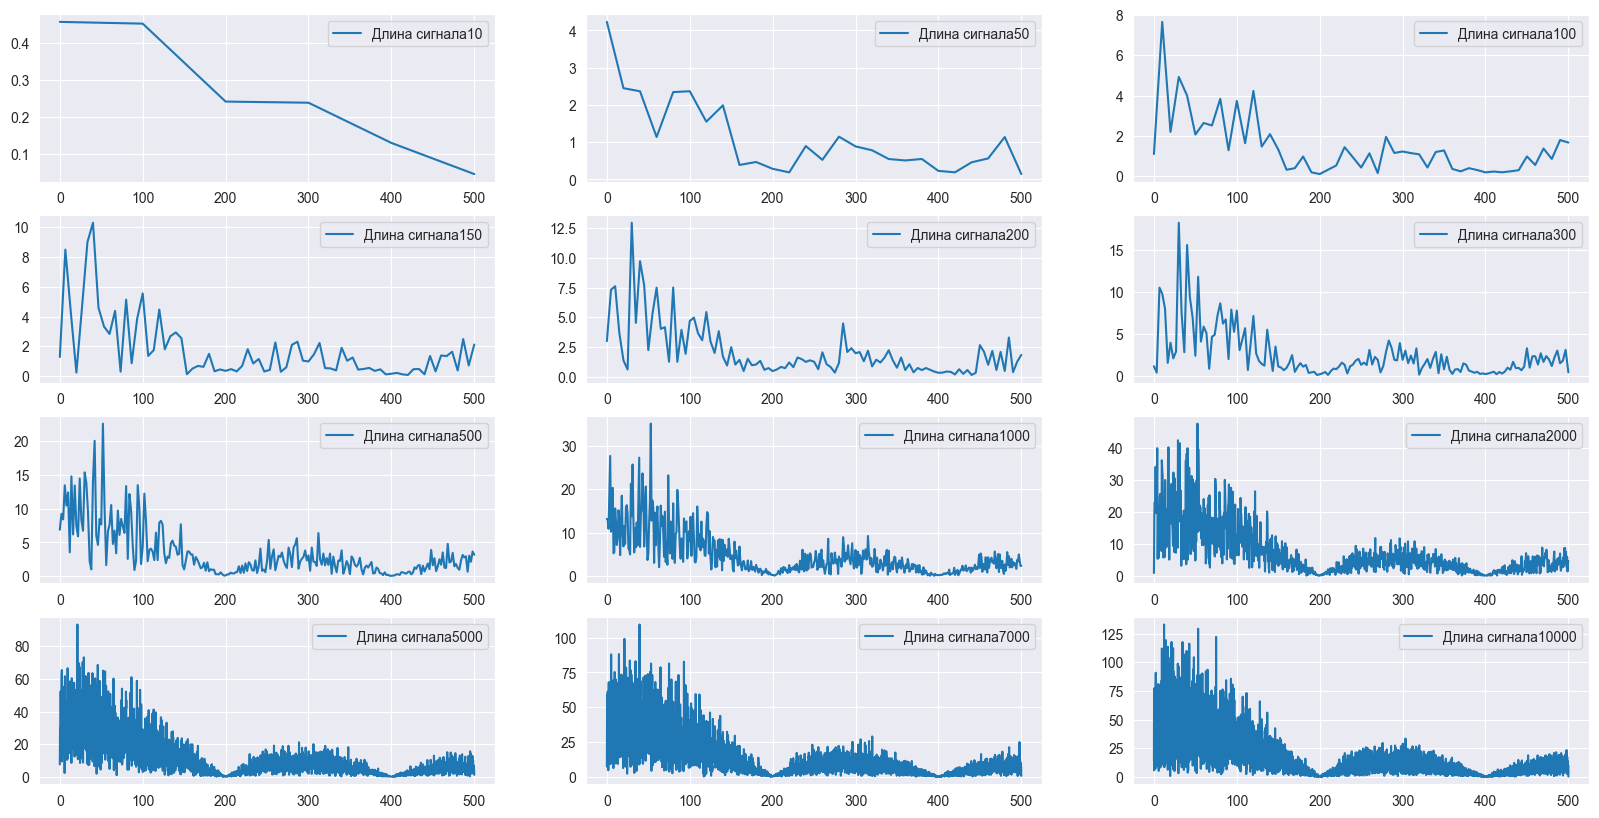

In [6]:
# Для примера возьмем mean 5
# Построение графиков
col_name = 'mean_5'
N = [10, 50, 100, 150, 200, 300, 500, 1000, 2000, 5000, 7000, 10000]
ncols = 3
if len(N) % ncols ==0:
    nrows = int(len(N) / ncols)
else:
    nrows = int(len(N)/ncols) + 1
# Задаем пространство для подграфиков
f, axes = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(20,10)) # параметры shareх и sharey - если False, то у каждого графика
                                                                         # будет отображена своя ось х и y, если True, то оси х и у будут
                                                                         # общими для всего пространства графиков
ind_col = list(df.columns).index(col_name)
ind = 0
flag = False
for i in range(nrows):
    for j in range(ncols):
        y = df.iloc[:N[ind], ind_col].values
        yf = rfft(y)
        xf = rfftfreq(N[ind], 1 / SAMPLE_RATE)
        # График с координатами положения (0,0) по отношению к оси
        axes[i,j].plot(xf, np.abs(yf),label='Длина сигнала'+ str(N[ind]))
        axes[i,j].legend()
        ind += 1

        if ind > len(N)-1:
            flag = True
            break
    if flag:
        break

plt.show()

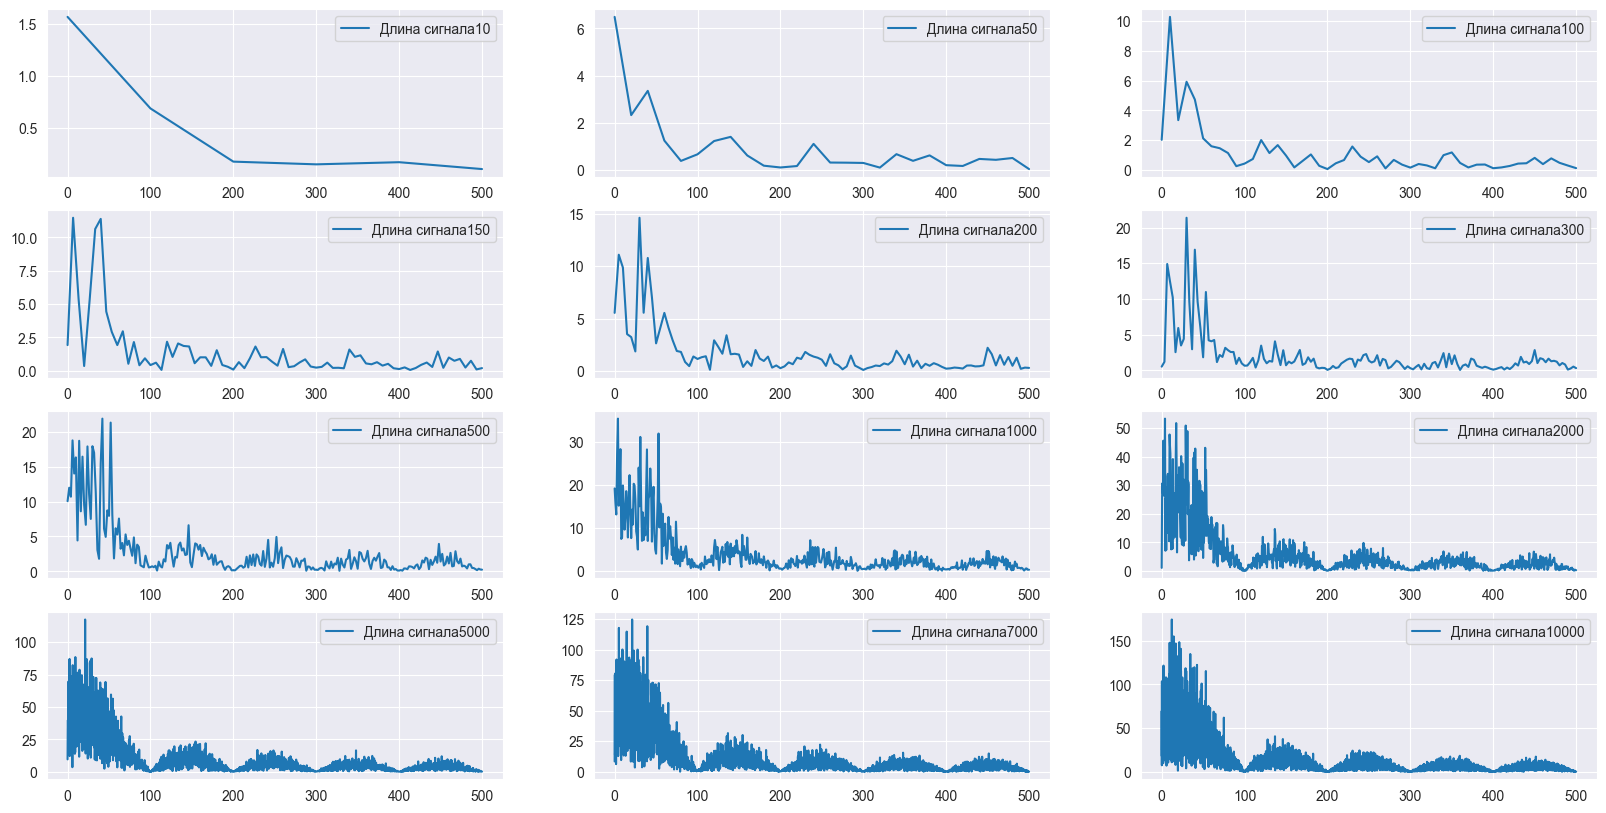

In [7]:
# Для примера возьмем mean 5
# Построение графиков
col_name = 'mean_10'
N = [10, 50, 100, 150, 200, 300, 500, 1000, 2000, 5000, 7000, 10000]
ncols = 3
if len(N) % ncols ==0:
    nrows = int(len(N) / ncols)
else:
    nrows = int(len(N)/ncols) + 1
# Задаем пространство для подграфиков
f, axes = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(20,10)) # параметры shareх и sharey - если False, то у каждого графика
                                                                         # будет отображена своя ось х и y, если True, то оси х и у будут
                                                                         # общими для всего пространства графиков
ind_col = list(df.columns).index(col_name)
ind = 0
flag = False
for i in range(nrows):
    for j in range(ncols):
        y = df.iloc[:N[ind], ind_col].values
        yf = rfft(y)
        xf = rfftfreq(N[ind], 1 / SAMPLE_RATE)
        # График с координатами положения (0,0) по отношению к оси
        axes[i,j].plot(xf, np.abs(yf),label='Длина сигнала'+ str(N[ind]))
        axes[i,j].legend()
        ind += 1

        if ind > len(N)-1:
            flag = True
            break
    if flag:
        break

plt.show()

# Сравниваем перекрытие сигналов и их спектры в зависимости от длины окна и процента перекрытия

1. Задать размер окна
2. Генерация 2-х сигналов размером с окно
3. Конкатенация
4. Рисуем спектр

In [36]:
def visualise_2_signals(mean1 = 2, mean2 = 5, overlaps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], window = 3000, SAMPLE_RATE = 1000):


    SAMPLE_RATE = SAMPLE_RATE  # Гц
    DURATION = int(window/SAMPLE_RATE) * 3  # Секунды
    x1 = np.random.normal(0,1,SAMPLE_RATE * (DURATION +1)) # Первый сигнал
    x2 = np.random.normal(0,1,SAMPLE_RATE * (DURATION +1)) # Второй сигнал

    # Усреднение, обрезание, нормировка, склейка
    x1 = pd.Series(x1).rolling(window = mean1).mean().dropna()
    x2 = pd.Series(x2).rolling(window = mean2).mean().dropna()
    min_len  = min(len(x1), len(x2))
    x1 = x1.values[:min_len]
    x2 = x2.values[:min_len]
    x1 = x1/(np.abs(x1).max())
    x2 = x2/(np.abs(x2).max())

    # Рисование
    ncols = 2
    nrows = 2 + len(overlaps)
    f, axes = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(15,30)) # параметры shareх и sharey - если False, то у каждого графика
                                                                             # будет отображена своя ось х и y, если True, то оси х и у будут
                                                                             # общими для всего пространства графиков
    # Только первый сигнал
    axes[0,0].plot(x1[:window],label=f'Первый сигнал, mean1 = {mean1}, window = {window}')
    axes[0,0].legend()
    # Считаем спектр
    y_f = rfft(x1[:window])
    x_f = rfftfreq(window, 1 / SAMPLE_RATE)
    axes[0,1].plot(x_f, np.abs(y_f),label=f'Первый сигнал, mean1 = {mean1}, window = {window}')
    axes[0,1].legend()

    # Только второй сигнал
    axes[1,0].plot(x2[:window],label=f'Второй сигнал, mean2 = {mean2}, window = {window}')
    axes[1,0].legend()
    # Считаем спектр
    y_f = rfft(x2[:window])
    x_f = rfftfreq(window, 1 / SAMPLE_RATE)
    axes[1,1].plot(x_f, np.abs(y_f),label=f'Второй сигнал, mean2 = {mean2}, window = {window}')
    axes[1,1].legend()

    for i in range(len(overlaps)):
        # Смесь сигналов
        len_1 = int(window * (1 - overlaps[i]))
        len_2 = window - len_1
        x = np.concatenate((x1[:len_1],x2[:len_2]))

        # Считаем спектр
        y_f = rfft(x)
        x_f = rfftfreq(window, 1 / SAMPLE_RATE)
        axes[2 +i,0].plot(x,label=f'Смесь 2 сигналов mean1 = {mean1}, mean2 = {mean2}, window = {window}, перекрытие {overlaps[i]}')
        axes[2 +i,0].legend()
        axes[2 +i,1].plot(x_f, np.abs(y_f),label=f'Смесь 2 сигналов mean1 = {mean1}, mean2 = {mean2}, window = {window}, перекрытие {overlaps[i]}')
        axes[2 +i,1].legend()

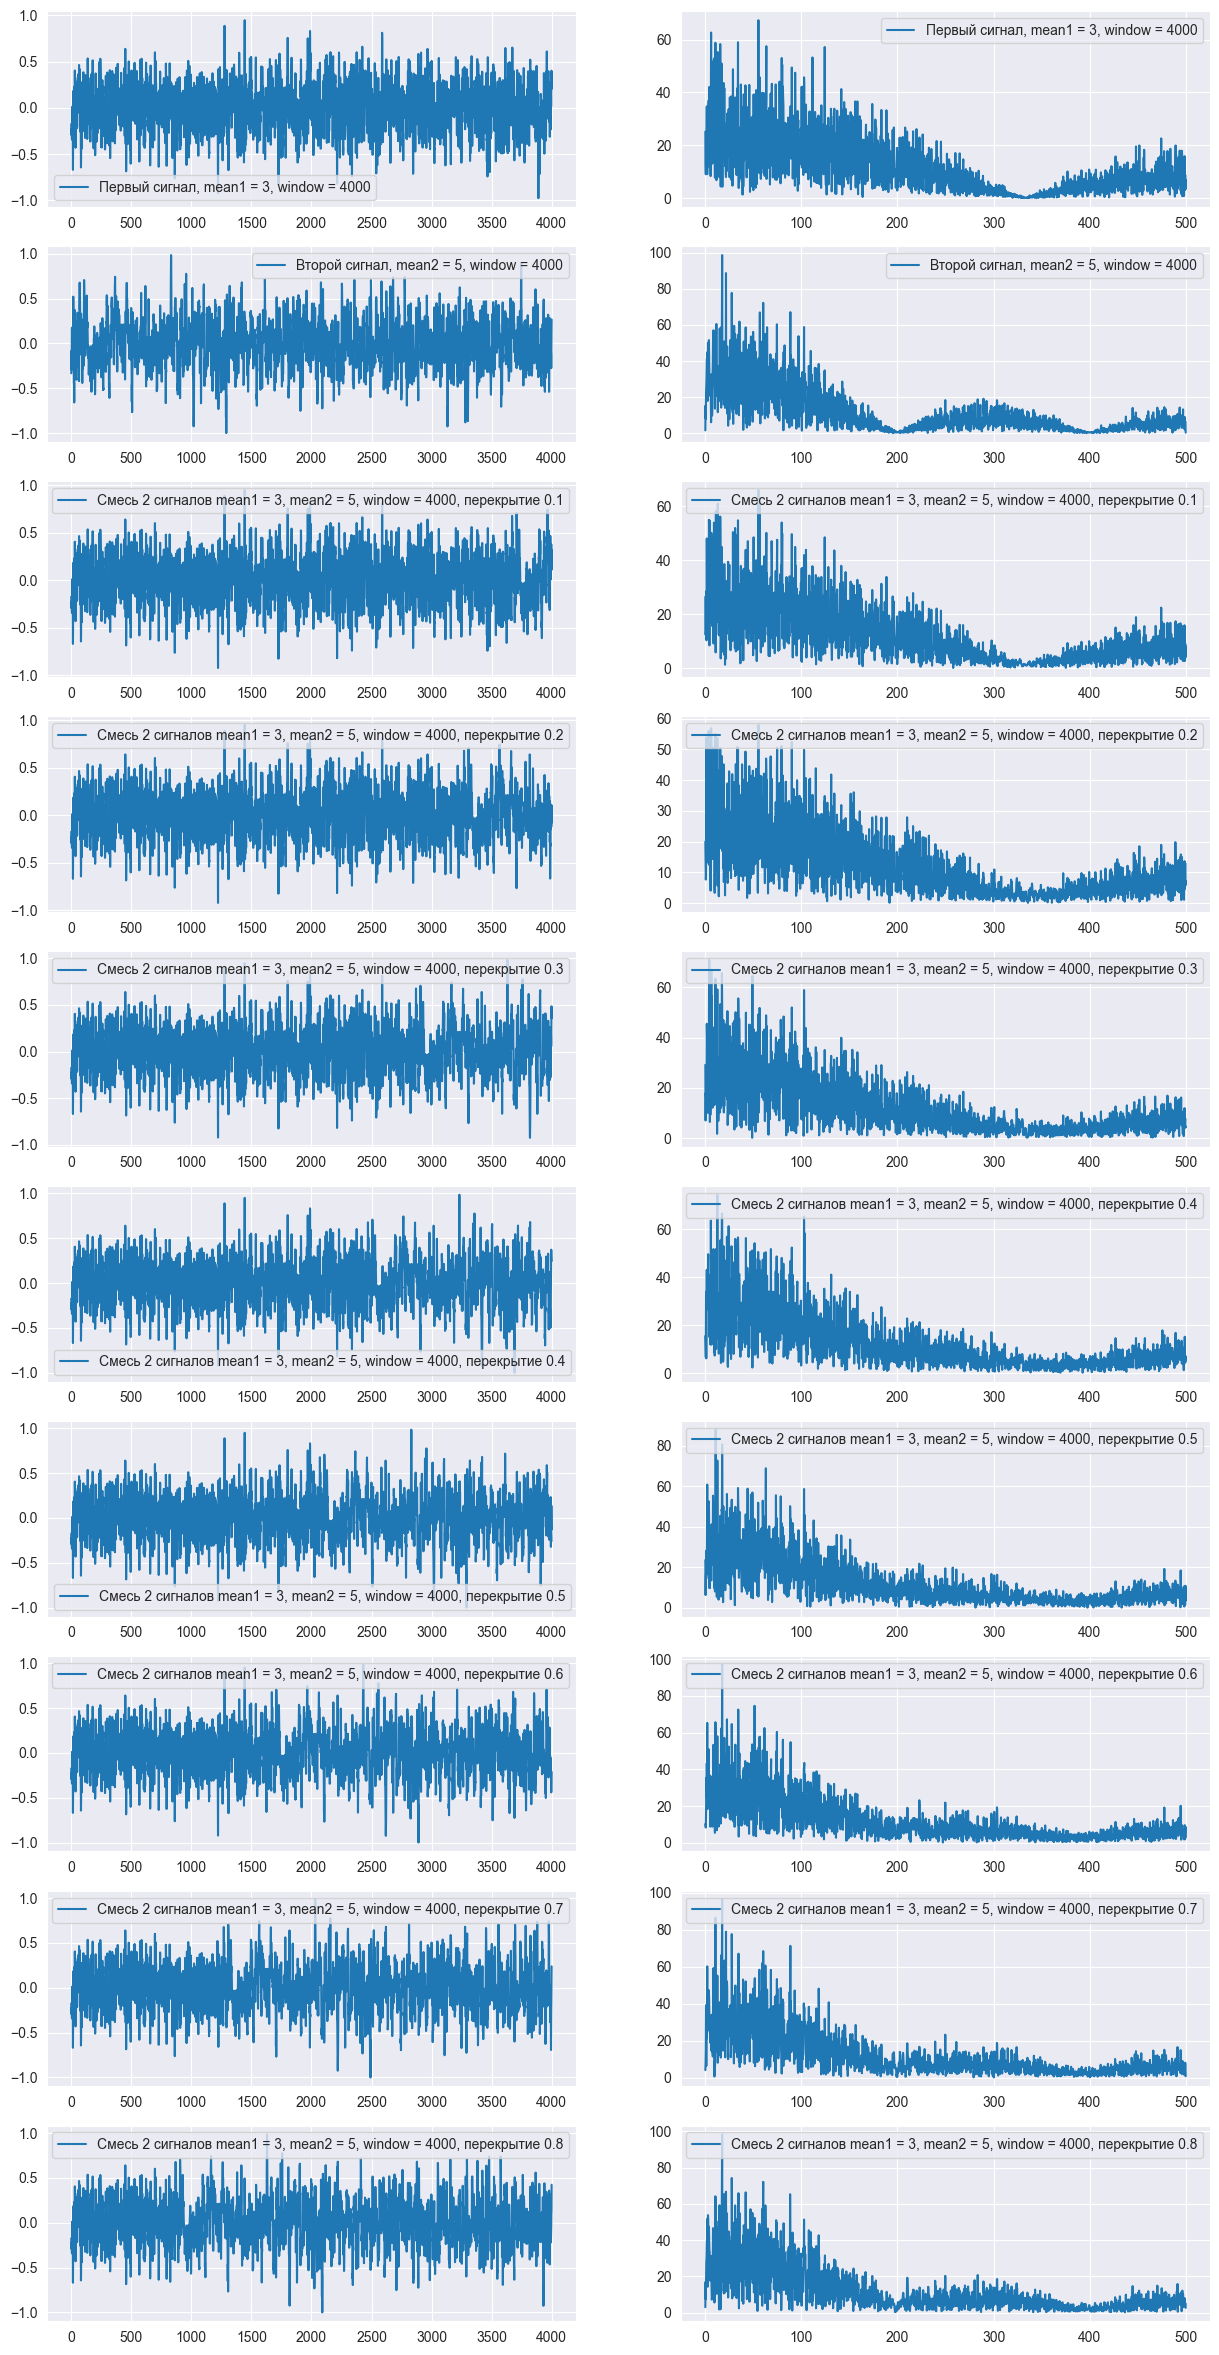

In [39]:
visualise_2_signals(mean1 = 3, mean2 = 5, overlaps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], window = 4000, SAMPLE_RATE = 1000)

# Через автокорреляцию

In [13]:
# Функция вычисления коэффициента автокорреляции

def get_corr_coef(data, back_steps): #  шаг смещения >= 0

    # Получение общих частей исходного и смещенного на back_steps рядов,
    # затем вычисление матрицы коэффициентов и отбор коэффициента из нужного места матрицы
    return np.corrcoef(data[back_steps:], data[:len(data) - back_steps])[0, 1]

In [14]:
# Функция рисования графика коэффициентов автокорреляции данных на разных шагах смещения

def make_autocorr(data, steps_max, plotting = False):
    # Задание последовательности шагов смещения от 0 до steps_max
    # и расчет коэффициентов автокорреляции для этих смещений
    steps = range(0, steps_max + 1)
    coefs = [get_corr_coef(data, i) for i in steps]

    if plotting:
        # Рисование графика коэффициентов автокорреляции
        plt.plot(steps, coefs)
        plt.xticks(steps)
        plt.xlabel('Шаги смещения')
        plt.ylabel('Коэффициент автокорреляции')
        plt.show()
    return np.array(coefs)

In [38]:
def acf(mean1 = 2, mean2 = 5, overlaps = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1], window = 3000, n_steps_part_window = 0.5):


    x1 = np.random.normal(0,1,int(window * 1.5)) # Первый сигнал
    x2 = np.random.normal(0,1,int(window * 1.5)) # Второй сигнал
    N_steps = int(n_steps_part_window * window)

    # Усреднение, обрезание, нормировка, склейка
    x1 = pd.Series(x1).rolling(window = mean1).mean().dropna()
    x2 = pd.Series(x2).rolling(window = mean2).mean().dropna()
    min_len  = min(len(x1), len(x2))
    x1 = x1.values[:min_len]
    x2 = x2.values[:min_len]
    x1 = x1/(np.abs(x1).max())
    x2 = x2/(np.abs(x2).max())

    # Рисование
    ncols = 2
    nrows = len(overlaps)
    f, axes = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(15,30)) # параметры shareх и sharey - если False, то у каждого графика
                                                                             # будет отображена своя ось х и y, если True, то оси х и у будут
                                                                             # общими для всего пространства графиков
    for i in range(len(overlaps)):
        # Смесь сигналов
        len_1 = int(window * (1 - overlaps[i]))
        len_2 = window - len_1
        x = np.concatenate((x1[:len_1],x2[:len_2]))
        x = x[:window]

        # Считаем спектр
        acf = make_autocorr(x, N_steps)
        axes[i,0].plot(x, label=f'АКФ смеси 2 сигналов ,  перекрытие {overlaps[i]}')
        axes[i,0].legend()
        axes[i,1].plot(acf,marker= "*",label=f'АКФ смеси смеси 2 сигналов , перекрытие {overlaps[i]}')
        axes[i,1].legend()

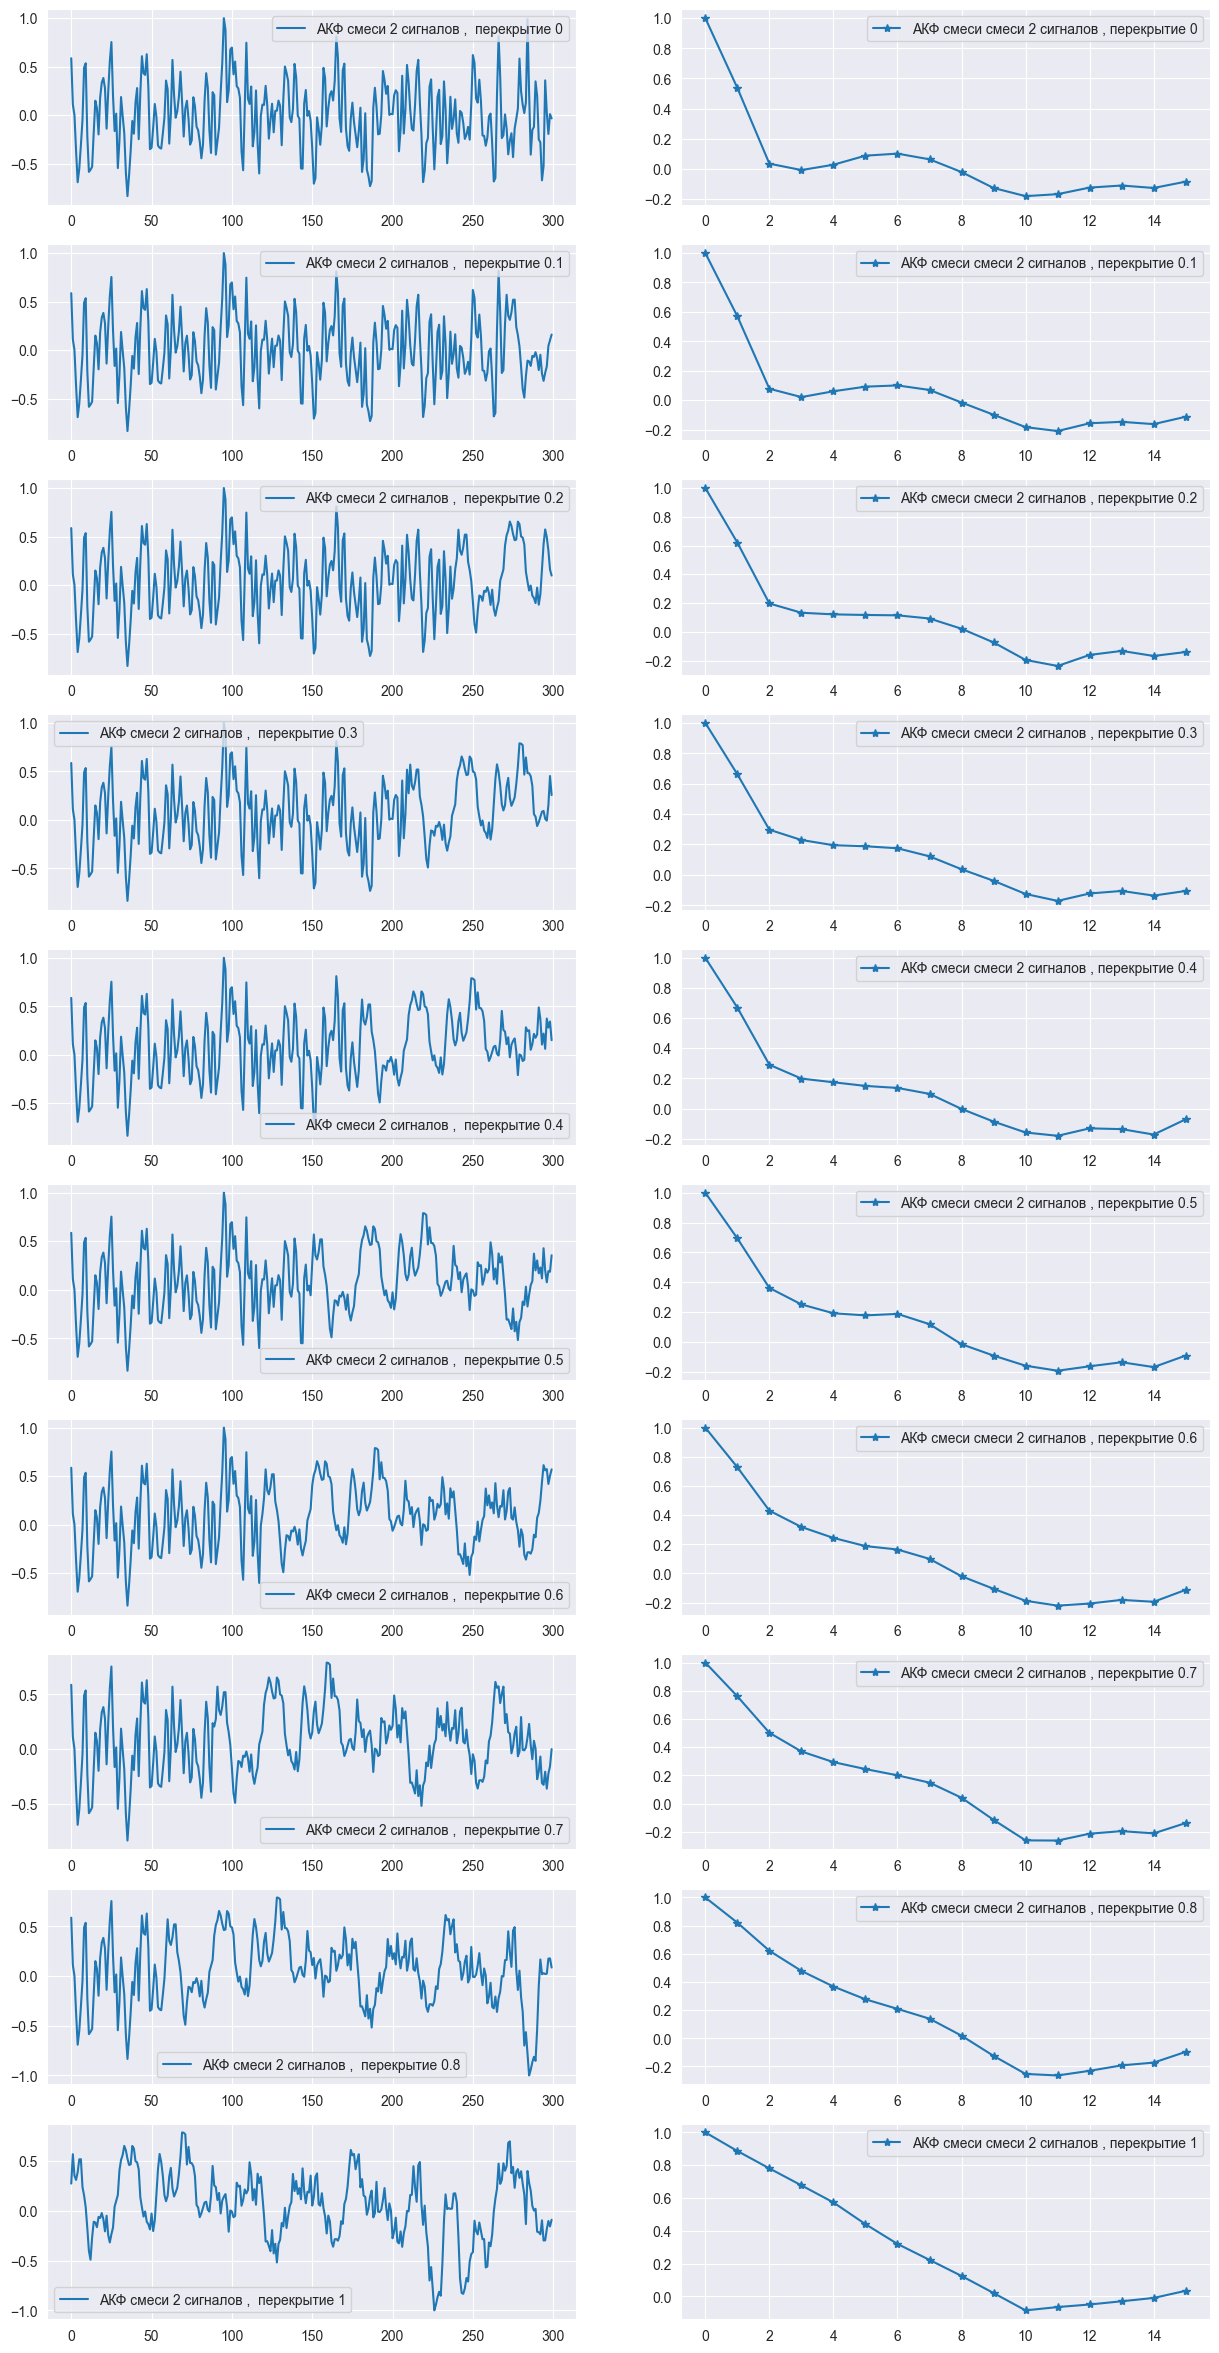

In [42]:
acf(mean1 = 2, mean2 = 10, overlaps = [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,1], window = 300, n_steps_part_window = 0.05)

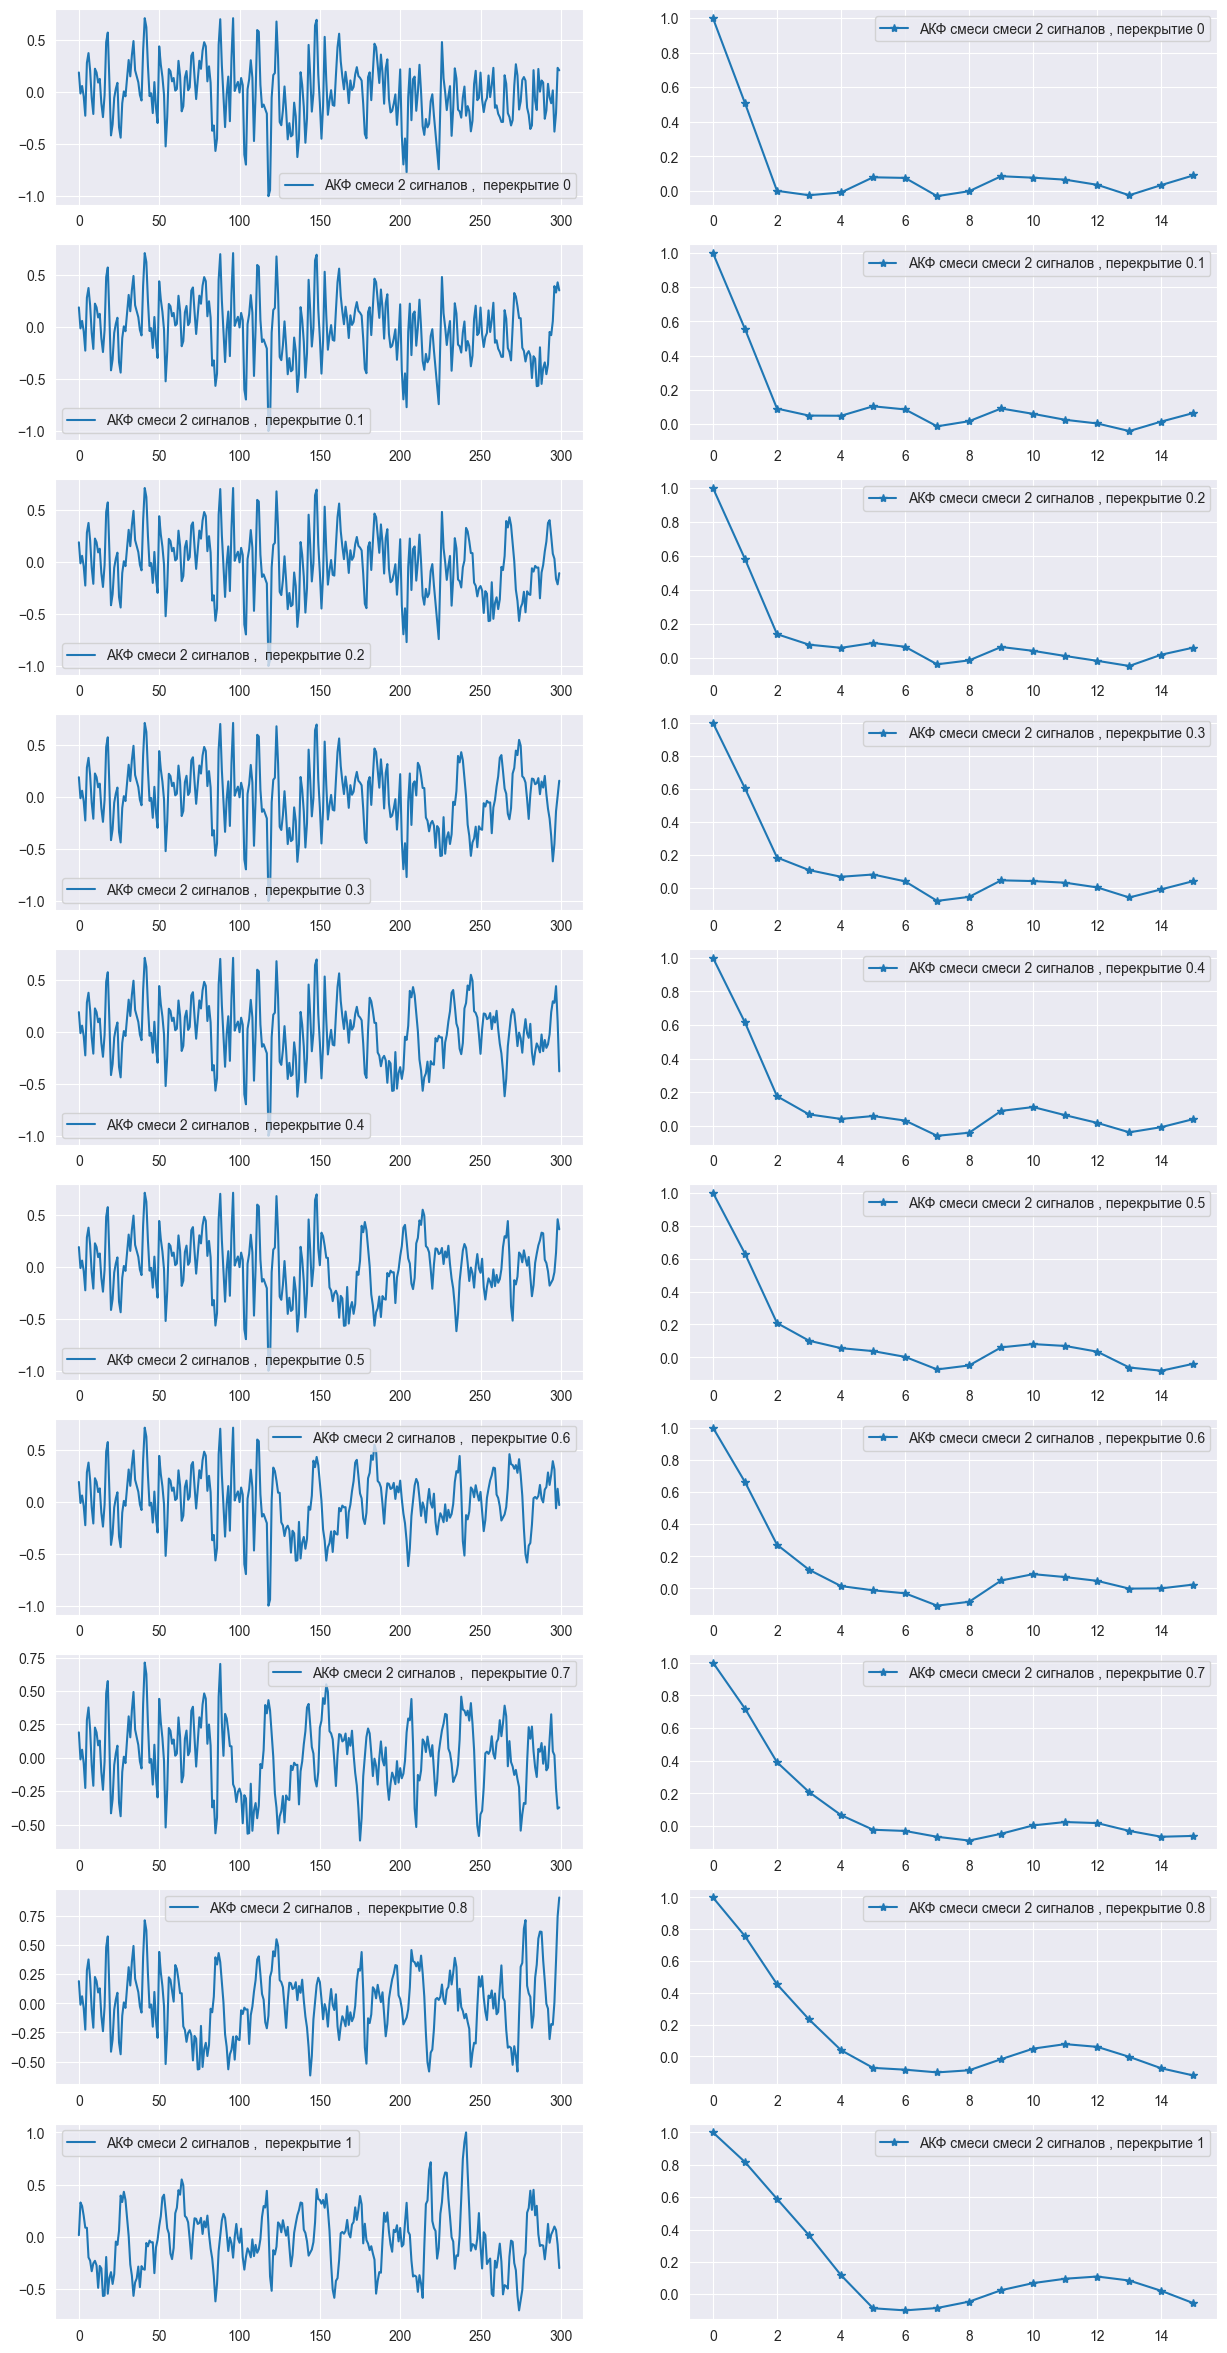

In [43]:
acf(mean1 = 2, mean2 = 5, overlaps = [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,1], window = 300, n_steps_part_window = 0.05)